# 02. Exploring relationships
## Notebook content:
    1. Importing visualization libraries and data
    2. Exploring relationships
         2.1. Correlations
         2.2. Scatterplots
         2.3. Pair plots
         2.4. Categorical plots

## 1. Importing visualisation libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Define path and import data.

path = r'C:\Users\bruna\Data Analysis Projects\2023-12 Superstore Sales Analysis'
sales_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_clean.pkl'))

## 2. Exploring relationships

### 2.1 Correlations

In [4]:
sales_clean.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Create a subset with only columns that are pertinent ('Sales', 'Quantity','Discount', 'Profit').

sub = sales_clean[['Sales', 'Quantity','Discount', 'Profit']]

In [6]:
sub

,Sales,Quantity,Discount,Profit
0,261.960,2,0.0,41.9136
2,14.620,2,0.0,6.8714
4,22.368,2,0.2,2.5164
5,48.860,7,0.0,14.1694
6,7.280,4,0.0,1.9656
...,...,...,...,...
9988,206.100,5,0.0,55.6470
9989,25.248,3,0.2,4.1028
9990,91.960,2,0.0,15.6332
9991,258.576,2,0.2,19.3932


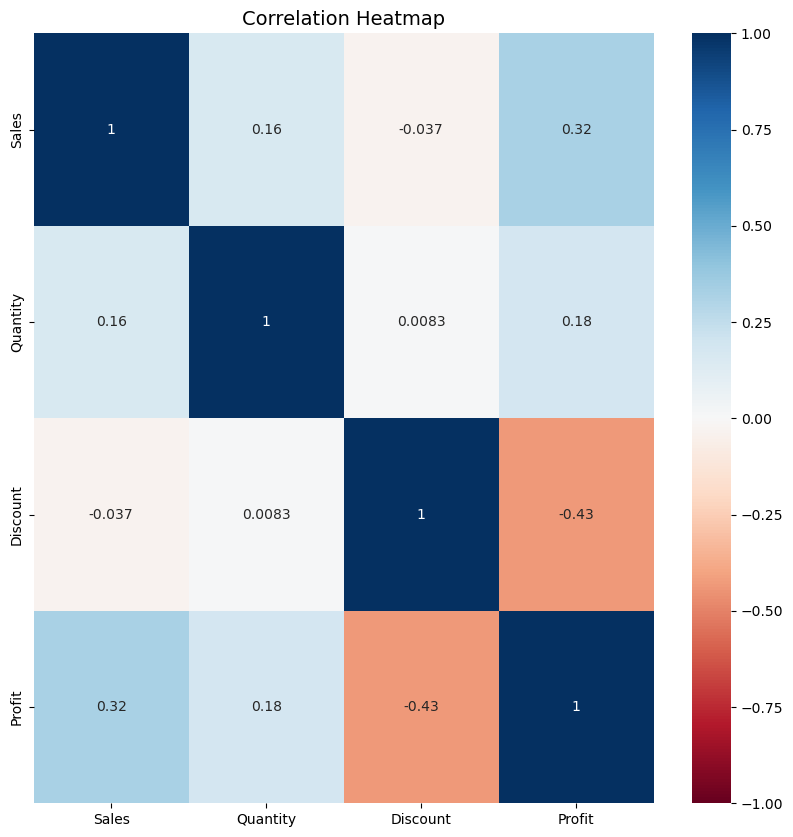

In [7]:
# Set the DPI for the figure
dpi = 300

# Create a subplot with matplotlib.
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), vmin=-1, vmax=1, annot = True, cmap = 'RdBu', ax = ax) # The `annot` argument allows the plot 
#to place the correlation coefficients onto the heatmap.
plt.title('Correlation Heatmap', fontsize=14) # add title

# Save visualisation
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Correlation_matrix.png'), bbox_inches='tight')

In [8]:
print(sub.corr())

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.162896 -0.037185  0.322309
Quantity  0.162896  1.000000  0.008275  0.182883
Discount -0.037185  0.008275  1.000000 -0.431420
Profit    0.322309  0.182883 -0.431420  1.000000


The above results show that there is a:
- positive strong correlation between Sales and Profit (0.32)
- negative strong correlation between Discount and Profit (-0.43)
- positive weak correlation between Quantity and Sales (0.16)
- positive weak correlation between Quantity and Profit (0.18)

Based on the results, I am interested in understanding better how the variables Discount and Profit are interconnected - is this a linear correlation?

The positive correlation between Sales and Profit is understandable: more sales lead to bigger profits (linear relationship).

Both investigations can be also be confirmed with a scatterplot.

### 2.2 Scatterplots

#### Discount vs Profit

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


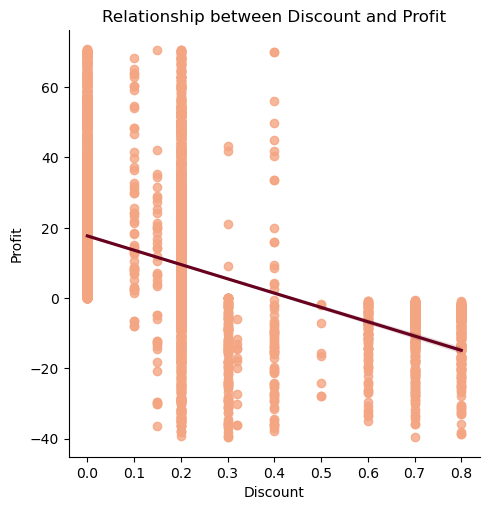

In [9]:
# Create a scatterplot for the 'Profit' and 'Discount' columns in seaborn
sns.lmplot(x = 'Discount', y = 'Profit', data = sales_clean, scatter_kws={'color': '#f4a582'}, line_kws={'color': '#67001f'})

# Add a title to the plot
plt.title('Relationship between Discount and Profit')

# Save visualisation
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Scatterplot_Profit_Discount.png'), bbox_inches='tight')

Based on the above graphic it is clear that discounts fall within set values between 0% and 80%). The use of discounts are directly correlated to lower profits (higher losses). Items with a discount of 50% or above always incurr in losses. It might be suitbale to analyse this further and understand why this items have this type of discount

Are these big discounts done to allow for other items to be stocked and increase sales?
- Hypothesis: items that get discounts above 50% are of bigger dimensions (big furniture items for example)

Are these big discounts done  attract customers so they buy products that produce bigger profits?
- Hypothesis: items that get discounts above 50% are bought with products that produce biger profits

#### Sales vs Profit

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


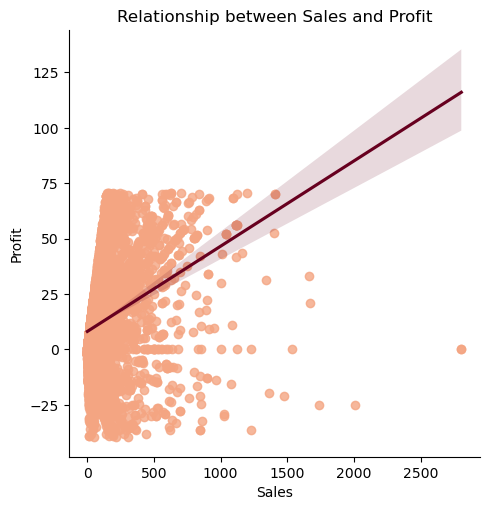

In [10]:
# Create a scatterplot for the 'Profit' and 'Sales' columns in seaborn
sns.lmplot(x = 'Sales', y = 'Profit', data = sales_clean, scatter_kws={'color': '#f4a582'}, line_kws={'color': '#67001f'})
           
# Add a title to the plot
plt.title('Relationship between Sales and Profit')

# Save visualisation
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Scatterplot_Profit_Sales.png'), bbox_inches='tight')

There is a correlation between Sales and Profit but it is not easy to visualise on the scatterplot due to the number of points and the accumalation of these on the bottom of graph (the majority of orders produce sales under 1000 USD).

To visualise better, I'll filter the Sales to under 10000 USD.

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


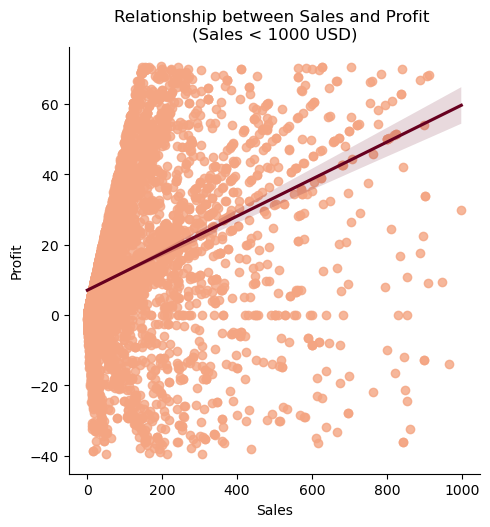

In [11]:
# Filter 'Sales' column to under 1000 USD
sales_under1000 = sales_clean[sales_clean['Sales'] < 1000]

# Create a scatterplot for the 'Profit' and 'Sales' columns in seaborn
sns.lmplot(x='Sales', y='Profit', data=sales_under1000, scatter_kws={'color': '#f4a582'}, line_kws={'color': '#67001f'})

# Add a title to the plot
plt.title('Relationship between Sales and Profit \n(Sales < 1000 USD)') #\n adds a line break

# Save visualisation
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Scatterplot_Profit_Salesunder1000USD.png'), bbox_inches='tight')

With the filtered visualisation it's easier to observe the positive correlation. There are however quite a lot of oders that incur in loss. As seen above, these are likely sales that have discounts. 

To confirm this I'll create a subset removing orders with discounts

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


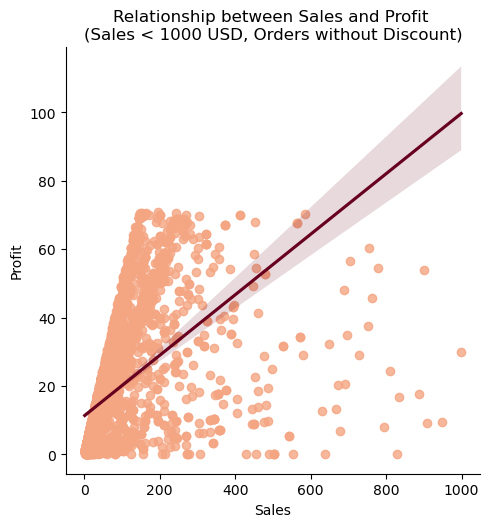

In [12]:
# Create a subset with 'discount' under 50% only
filtered_discount = sales_under1000[sales_under1000['Discount'] == 0]

# Create a scatterplot for the 'Profit' and 'Sales' columns in seaborn
sns.lmplot(x='Sales', y='Profit', data=filtered_discount, scatter_kws={'color': '#f4a582'}, line_kws={'color': '#67001f'})

# Add a title to the plot
plt.title('Relationship between Sales and Profit \n(Sales < 1000 USD, Orders without Discount)') #\n adds a line break

# Save visualisation
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Scatterplot_Profit_Sales_nodiscount.png'), bbox_inches='tight')


In [13]:
# Expot sales filtered database
sales_under1000.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_under1000.pkl'))

When orders with discounts are removed from the data, there is a clear tendency for bigger sales resulting in bigger profits. We can also see that there are a few items that have very high sales, but low profit. From a business perspective, it might be useful to look deeper into this items to assess their sale price, or even if it makes sense to keep them in the assortment at all. Unless this is a business strategy (ex, attracting customers to buy other products), priority should be given to items that have bigger profits.
- Hyphotesis: items with a disproportional low profit for the sales figure are often purchased with items that return higher profits

### 2.3. Pair plots:

In [14]:
# Keep only the variables to be used in the pair plot
sub_2 = sub[['Sales', 'Quantity','Discount', 'Profit']]


C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hu

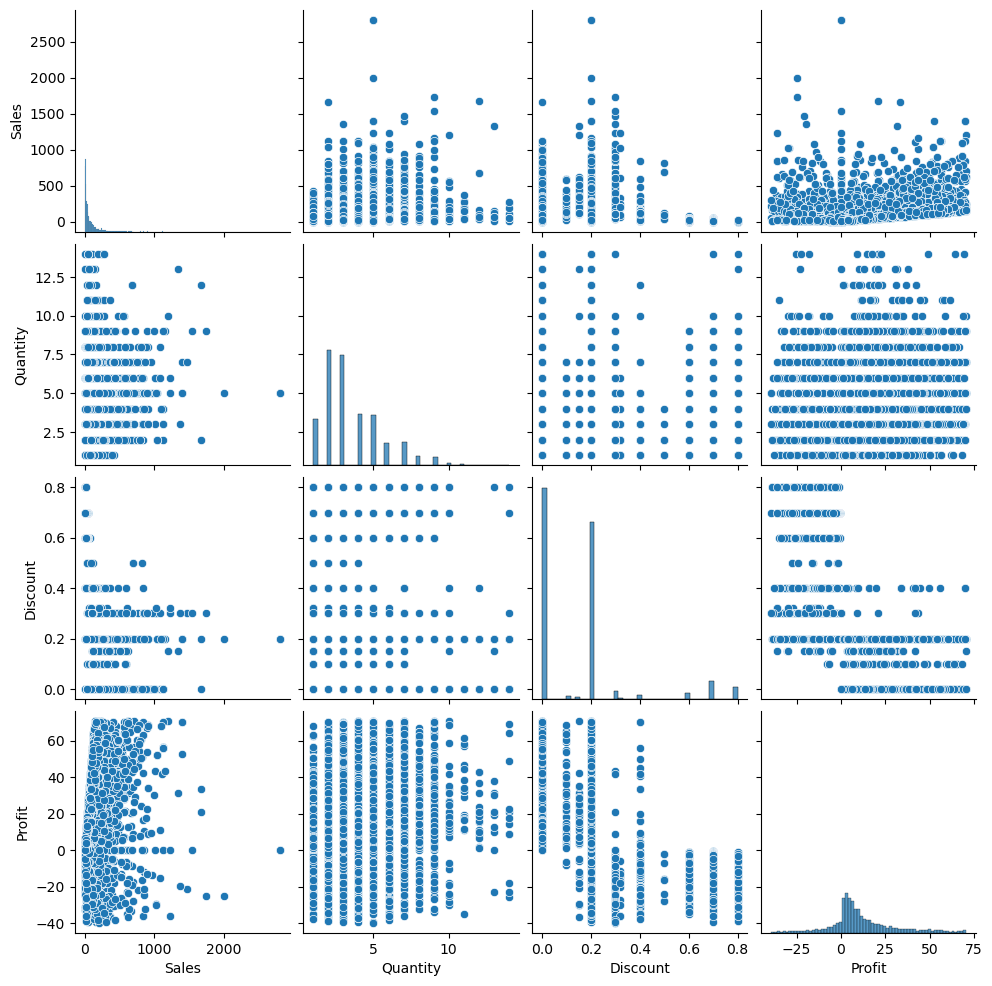

In [15]:
# Create a pair plot 
g = sns.pairplot(sub_2, palette = 'RdBu')

# Save visualisation
g.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Pairplots.png'), bbox_inches='tight')


#### Conclusions

##### a) Quantity vs Sales: 
There isn't a direct correlation between number of items sold and sales value. This is likely related to the discounts applied to items (almost all orders with quantitites above 10 items result in sales under 500 USD)
- ##### Hypothesis:
  customers place bigger orders (quantitites above 10 items) due to higher discounts

##### b) Discount vs Sales:
Higher discounts result in lower sales. This makes sense because, since the sales figure account for the discount applied


##### c) Discount vs Quantity: 
There is no correlation between discount and quantity sold, which again might indicate that the discounts are not having the desired impact (unless they are a business strategy such as attraction of new customers, brand recognition, etc)


##### d) Profit vs Sales:
As seen before, there is a slight tendency for bigger sales resulting in profit, but this is truer when discounts are excluded. Hypothesis were set earlier:
- ##### Hypothesis:
  Items with a disproportional low profit for the sales figure are often purchased with items that return higher profits


##### e) Quantity vs Profit: 
Although quantity vs sales seem to show that higher quantities bought result in lower sales (usually under 500 USD), looking at quantity vs profit seems to show that items bough on quantities over 10 seem to almost always return in profit). Perhaps this is because items bought in higher quantities tens to be cheaper items (resulting in lower sales), but with higher profit margings (resulting in higher profit):
- ##### Hypothesis:
  Items bought in quantities 10 and above tend to be on the cheap side
- ##### Hypothesis:
  Items bought in quantities 10 and above tend to have higher profit margins (look at profit as % of retail price)


##### f) Discount vs Profit:
As seen before, higher discounts result in lower sales. Hypothesis were set earlier:
- ##### Hypothesis:
  Items that get discounts above 50% are of bigger dimensions (big furniture items for example)
- ##### Hypothesis:
  Items that get discounts above 50% are bought with products that produce biger profits


### 2.4. Categorical plots:

In [79]:
sales_clean.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Profit_Category'],
      dtype='object')

#### Discount vs Profit 

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Profit', ylabel='Count'>

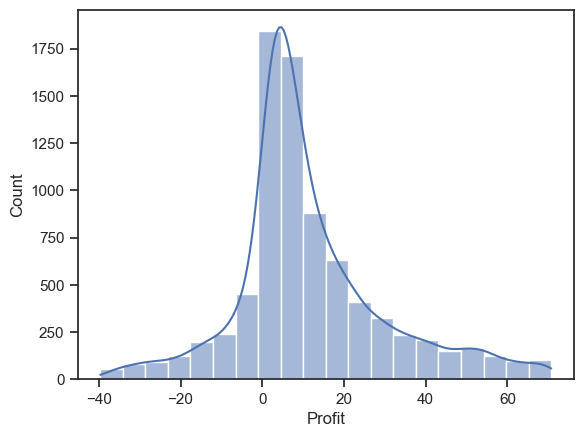

In [67]:
# Create a categorical variable that splits the 'Discount column into categories

sns.histplot(sales_clean['Profit'], bins = 20, kde = True)

In [73]:
sales_clean.loc[sales_clean['Profit'] < -20, 'Profit_Category'] = 'High loss'

In [74]:
sales_clean.loc[(sales_clean['Profit'] >= -20) & (sales_clean['Profit'] < 0), 'Profit_Category'] = 'Low loss'

In [75]:
sales_clean.loc[(sales_clean['Profit'] >= 0) & (sales_clean['Profit'] < 10), 'Profit_Category'] = 'Low profit'

In [76]:
sales_clean.loc[(sales_clean['Profit'] >= 10) & (sales_clean['Profit'] < 30), 'Profit_Category'] = 'Medium profit'

In [77]:
sales_clean.loc[sales_clean['Profit'] >= 30, 'Profit_Category'] = 'High profit'

In [78]:
sales_clean['Profit_Category'].value_counts(dropna = False)

Profit_Category
Low profit       3516
Medium profit    2144
High profit      1186
Low loss          980
High loss         287
Name: count, dtype: int64

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

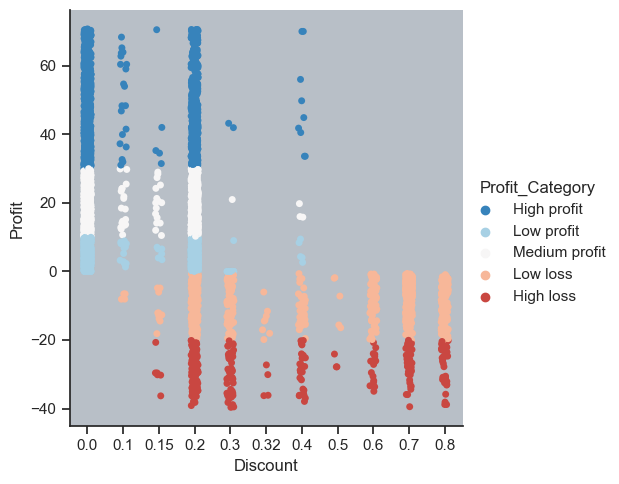

In [126]:
# Create a categorical plot in seaborn using the profit categories created above

sns.set(style='ticks')
g = sns.catplot(x='Discount', y='Profit', hue='Profit_Category', data=sales_clean, palette='RdBu_r')
g.ax.set_facecolor('#b8bfc7') #sets the background colour to grey

# Save visualisation
g.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Catplot_Discount_Profit.png'), bbox_inches='tight')


##### Conclusion:
- It is more obvious that items with profits (dark blue, white and light blue) are items with discounts mostly up to 20%.
- Items with discounts over 50% never result in profits.
- Items with discount of 30% or more almost always incur in losses (orange and red).

#### Discount vs Quantity

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Quantity', ylabel='Count'>

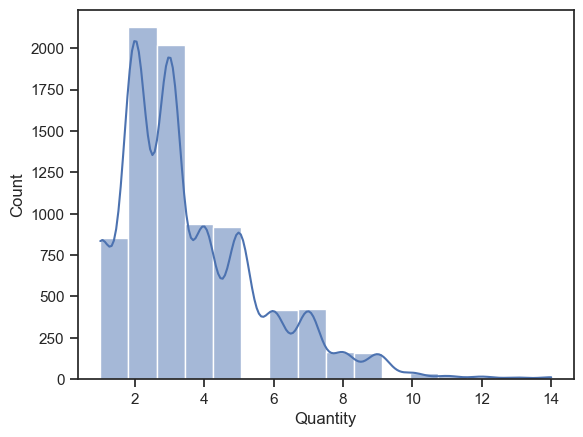

In [119]:
# Create a categorical variable that splits the 'Discount column into categories

sns.histplot(sales_clean['Quantity'], bins = 16, kde = True)

In [120]:
sales_clean.loc[sales_clean['Quantity'] < 2, 'Quantity_Category'] = 'Small order'

In [121]:
sales_clean.loc[(sales_clean['Quantity'] >= 2) & (sales_clean['Quantity'] < 5), 'Quantity_Category'] = 'Medium order'

In [122]:
sales_clean.loc[sales_clean['Quantity'] >= 5, 'Quantity_Category'] = 'Large order'

In [123]:
sales_clean['Quantity_Category'].value_counts(dropna = False)

Quantity_Category
Medium order    5081
Large order     2179
Small order      853
Name: count, dtype: int64

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

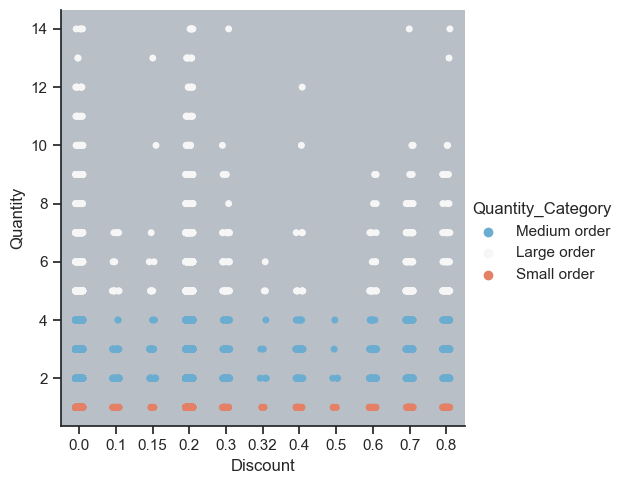

In [127]:
# Create a categorical plot in seaborn using the quantity categories created above

sns.set(style='ticks')
g = sns.catplot(x='Discount', y='Quantity', hue='Quantity_Category', data=sales_clean, palette='RdBu_r')
g.ax.set_facecolor('#b8bfc7') #sets the background colour to grey

# Save visualisation
g.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Catplot_Discount_Quantity.png'), bbox_inches='tight')


#### Conclusion:
- In this visualisation is a bit more clear that discounts don't have a significant impact on quantity orderer. There are larger orders placed accross the entire span of discounts.
- Items with high discounts are also purchased as part of small and medium orders.